In [1]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
df= pd.read_csv("phishing_site_urls.csv")

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
df.shape

(549346, 2)

In [6]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

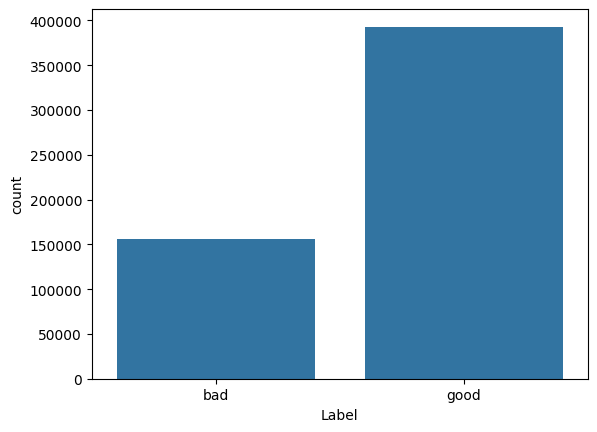

In [7]:
sns.countplot(x="Label",data=df)

PREPROCESSING
od.

Now we can Vectoize the URLs.We can gather words from the URLs using Tokenizer

RegexpTokenizer

we are able to extract the tokens from string by using regular expression with RegexpTokenizer() method.

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
tokenizer.tokenize(df.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [10]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.090634200023487 sec


In [11]:
df.sample(5)

,URL,Label,text_tokenized
386639,mediafire-files.com/index.php?search=Hole+Nobo...,good,"[mediafire, files, com, index, php, search, Ho..."
277931,amazon.com/Your-Love-Broke-Through-Worship/dp/...,good,"[amazon, com, Your, Love, Broke, Through, Wors..."
46994,adregionet.pl/wp-content/plugins/akismet/63828...,bad,"[adregionet, pl, wp, content, plugins, akismet]"
81510,www.lollie.com/thanks/mothersday2000-800.html,good,"[www, lollie, com, thanks, mothersday, html]"
227005,people.famouswhy.com/vince_albritton/,good,"[people, famouswhy, com, vince, albritton]"


SnowballStemmer


Snowball is a small string processing language that gives the root words

In [12]:
stemmer = SnowballStemmer("english") # choose a language

In [13]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 42.269227999961004 sec


In [14]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
193811,gis.lowellma.gov/,good,"[gis, lowellma, gov]","[gis, lowellma, gov]"
376187,linkedin.com/pub/danielle-maude-roy-dumas/2b/9...,good,"[linkedin, com, pub, danielle, maude, roy, dum...","[linkedin, com, pub, daniell, maud, roy, duma, b]"
112030,malegaoncity.com/wp-settings/engine/,bad,"[malegaoncity, com, wp, settings, engine]","[malegaonc, com, wp, set, engin]"
292577,blackmonsterweapons.net/main.shtml,good,"[blackmonsterweapons, net, main, shtml]","[blackmonsterweapon, net, main, shtml]"
451655,tripadvisor.com/Tourism-g46582-Long_Branch_New...,good,"[tripadvisor, com, Tourism, g, Long, Branch, N...","[tripadvisor, com, tourism, g, long, branch, n..."


In [15]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.22273200005292892 sec


In [16]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [17]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [18]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [19]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


Creating Model

CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [20]:
cv = CountVectorizer()

In [21]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [22]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 350837))

In [23]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

LogisticRegression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(trainX,trainY)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
lr.score(testX,testY)

0.9657193618616978

Logistic Regression provide 96% accuracy,Now we will store the score in the dictionary so that we can find which model performs the best.

Lets dump the model in pickle.

In [28]:
pickle.dump(lr,open('phishing.pkl','wb'))

In [29]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9657193618616978


c:\Users\ASUS\Phishing Detection Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96393920087376
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     78670
           1       0.97      0.90      0.93     31200

    accuracy                           0.96    109870
   macro avg       0.97      0.94      0.95    109870
weighted avg       0.96      0.96      0.96    109870



C:\Users\ASUS\AppData\Local\Temp\ipykernel_27936\2340536941.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='RdYlBu')


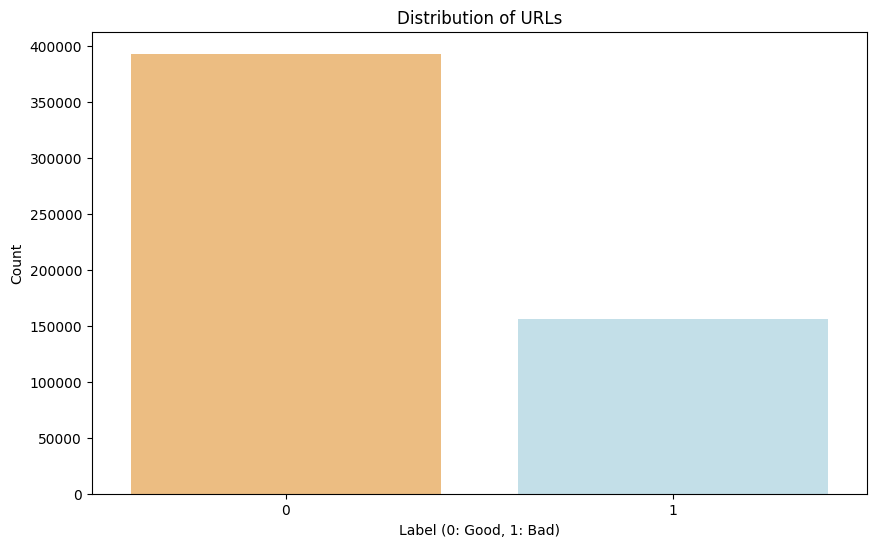

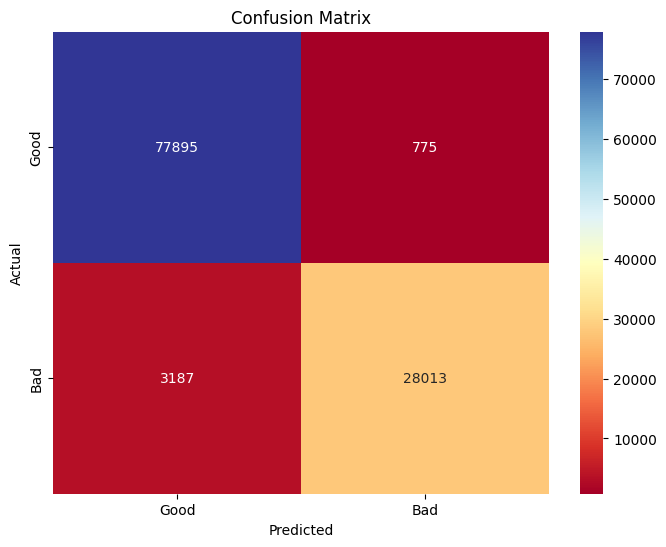

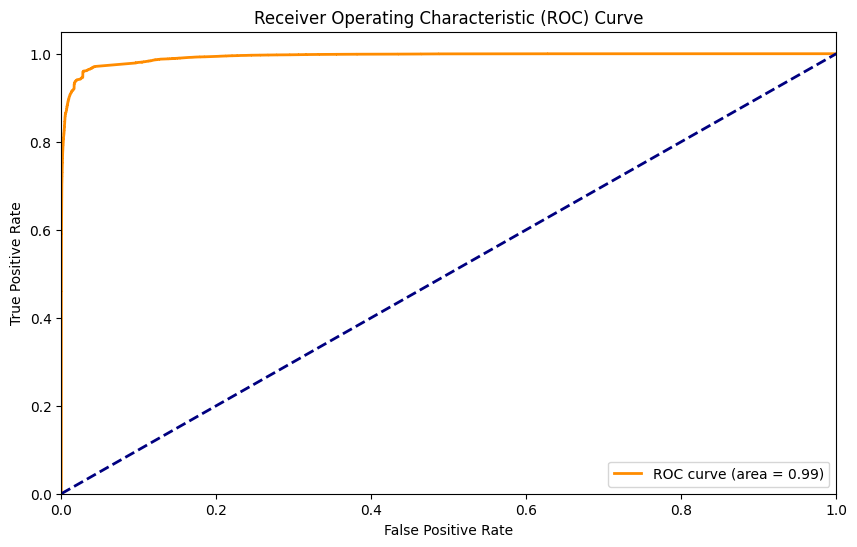

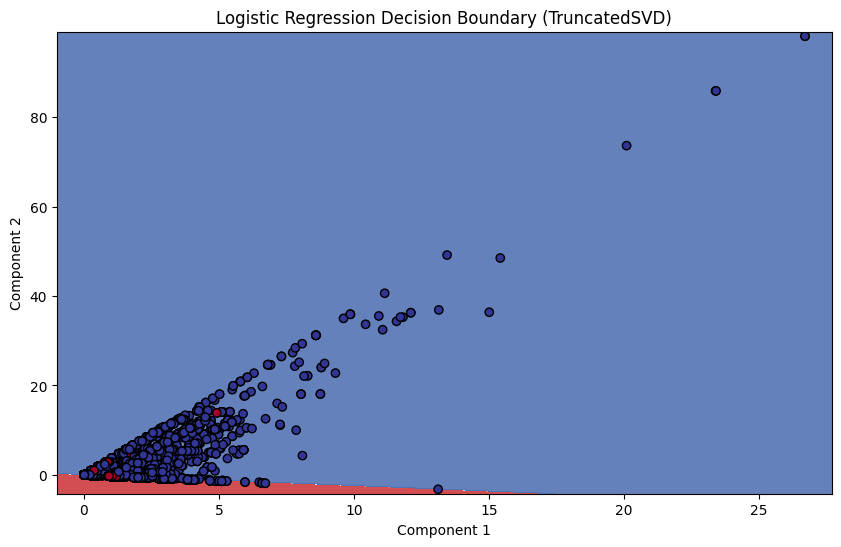

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import TruncatedSVD

# Load the dataset
df = pd.read_csv('phishing_site_urls.csv')

# Data Preprocessing
df['Label'] = df['Label'].map({'bad': 1, 'good': 0})
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['URL'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Visualization 1: Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, palette='RdYlBu')
plt.title('Distribution of URLs')
plt.xlabel('Label (0: Good, 1: Bad)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 3: ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualization 4: Decision Boundary using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Train the logistic regression model on the SVD-transformed data
model_svd = LogisticRegression()
model_svd.fit(X_train_svd, y_train)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_svd[:, 0].min() - 1, X_train_svd[:, 0].max() + 1
y_min, y_max = X_train_svd[:, 1].min() - 1, X_train_svd[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = model_svd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Logistic Regression Decision Boundary (TruncatedSVD)')
plt.show()


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.96393920087376
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     78670
           1       0.97      0.90      0.93     31200

    accuracy                           0.96    109870
   macro avg       0.97      0.94      0.95    109870
weighted avg       0.96      0.96      0.96    109870



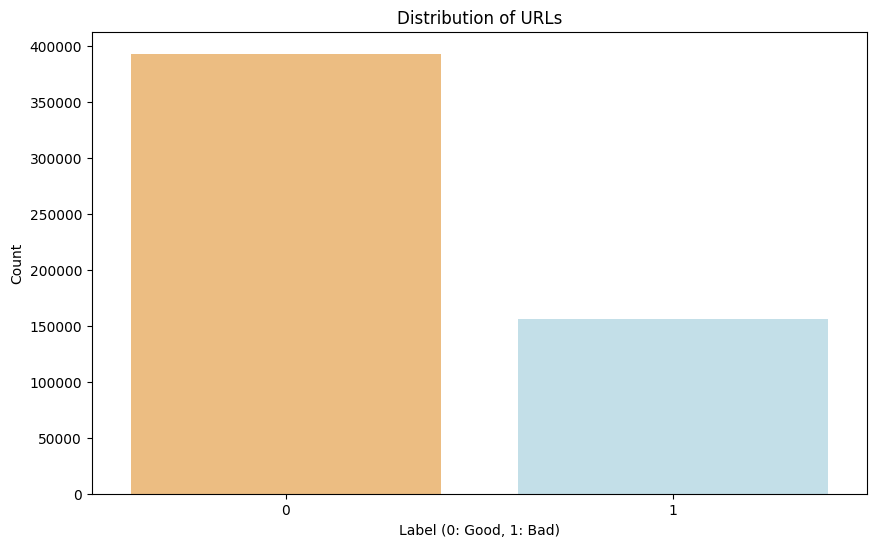

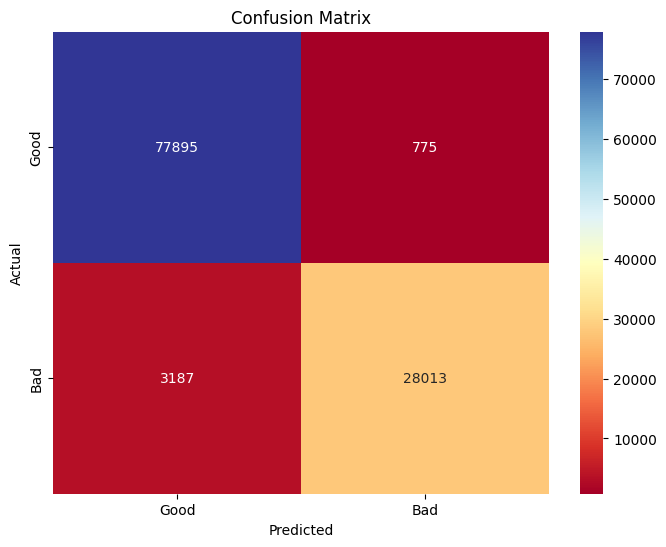

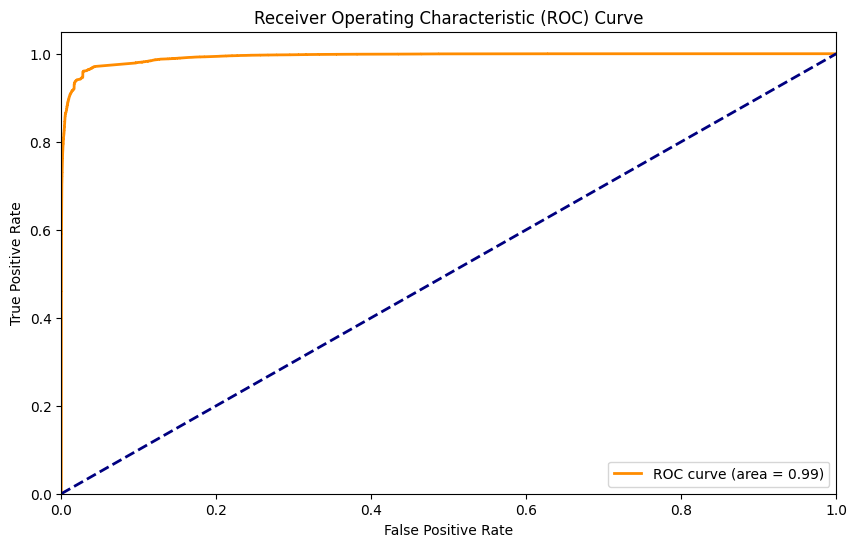

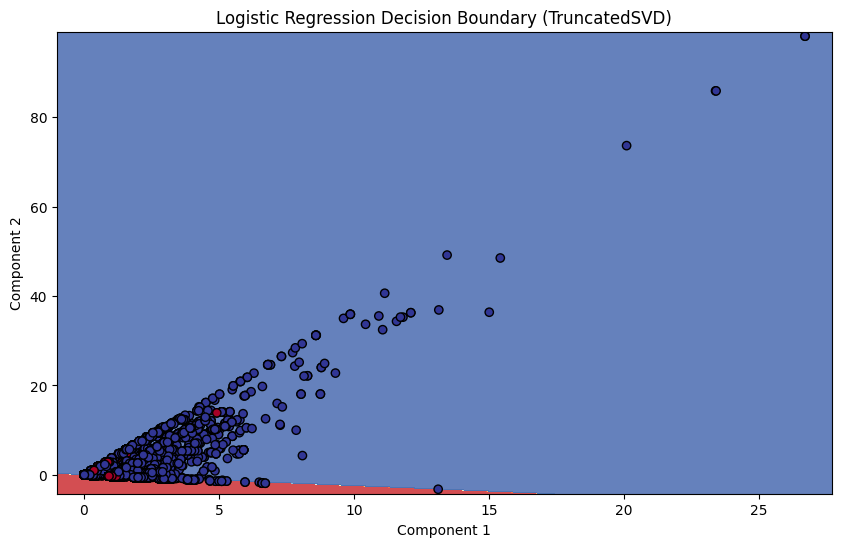

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import TruncatedSVD

# Load the dataset
df = pd.read_csv('phishing_site_urls.csv')

# Data Preprocessing
df['Label'] = df['Label'].map({'bad': 1, 'good': 0})
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['URL'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# Visualization 1: Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, palette='RdYlBu')
plt.title('Distribution of URLs')
plt.xlabel('Label (0: Good, 1: Bad)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 3: ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualization 4: Decision Boundary using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Train the logistic regression model on the SVD-transformed data
model_svd = LogisticRegression()
model_svd.fit(X_train_svd, y_train)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_svd[:, 0].min() - 1, X_train_svd[:, 0].max() + 1
y_min, y_max = X_train_svd[:, 1].min() - 1, X_train_svd[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = model_svd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Logistic Regression Decision Boundary (TruncatedSVD)')
plt.show()


In [31]:
# Save both the model and vectorizer to use them together
import pickle

# Create a dictionary containing both the model and vectorizer
model_artifacts = {
    'model': model,
    'vectorizer': vectorizer
}

# Save to a pickle file
with open('phishing_model.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)
    
print("Model and vectorizer saved to 'phishing_model.pkl'")

Model and vectorizer saved to 'phishing_model.pkl'
